In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [4]:
df = pd.read_csv(r"E:\PROJECT\water_potability1.csv") 
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.54173     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [5]:
df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [6]:
df.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690300     6.127421   307.699498   
50%       7.036752   196.967627  20927.833605     7.130299   333.073546   
75%       8.062066   216.667456  27332.762125     8.114887   359.950170   
max      14.000000   323.124000  61227.196010    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792305       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

<Axes: >

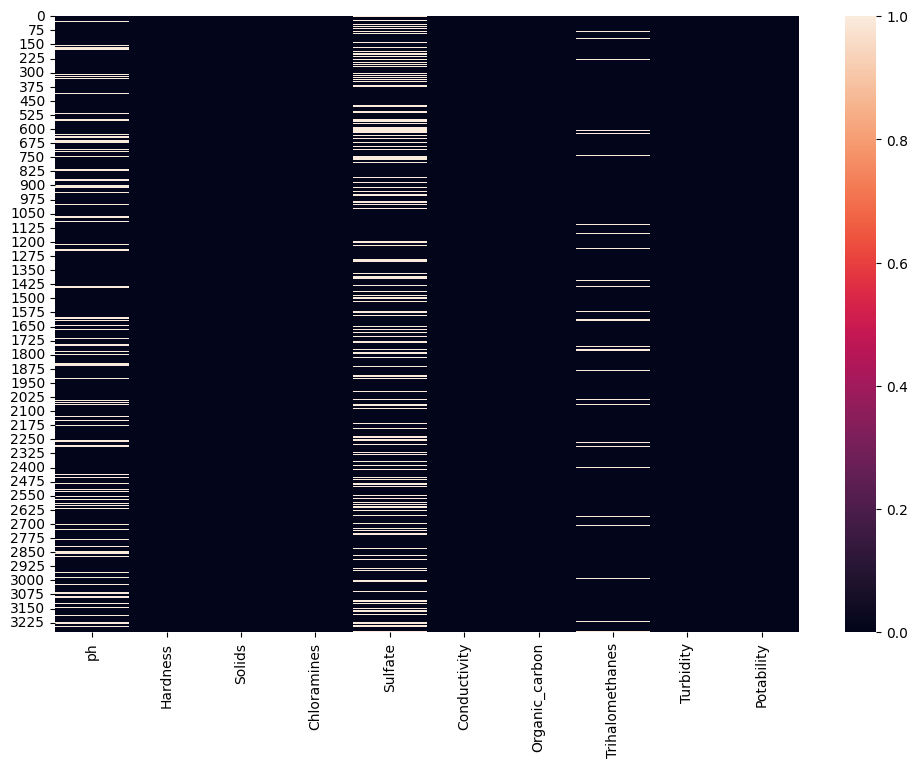

In [9]:
plt.figure(figsize=(12,8))

sns.heatmap(df.isnull())


<Axes: >

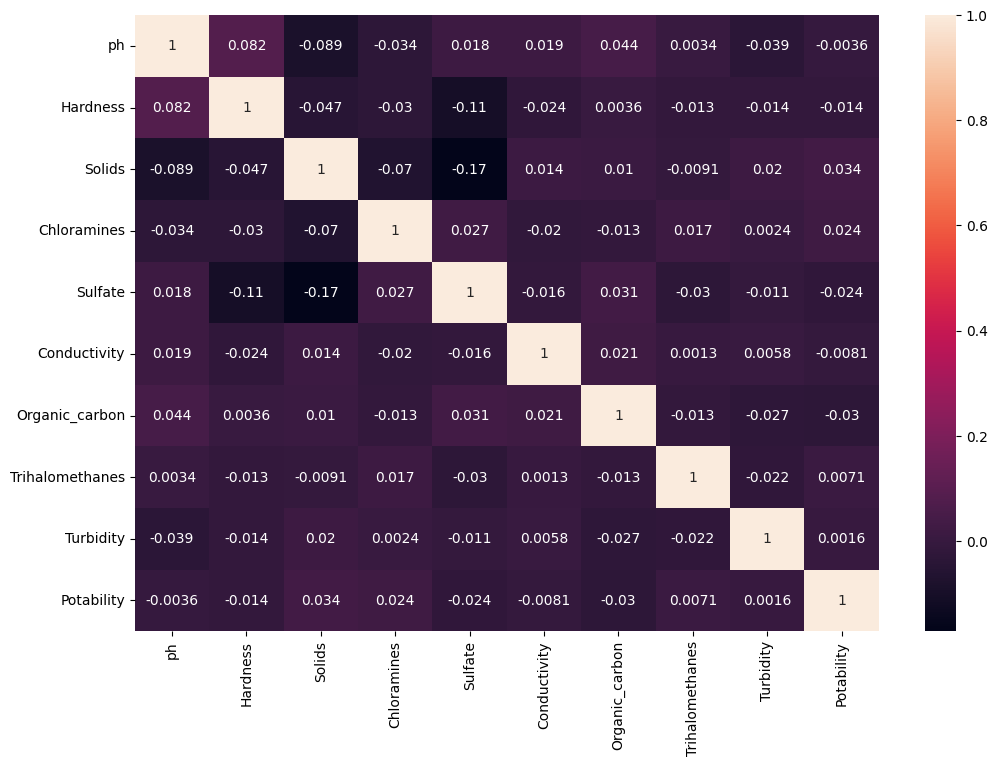

In [10]:
#data visulalization
plt.figure(figsize=(12,8))

sns.heatmap(df.corr(),annot=True)

<Axes: xlabel='Potability', ylabel='count'>

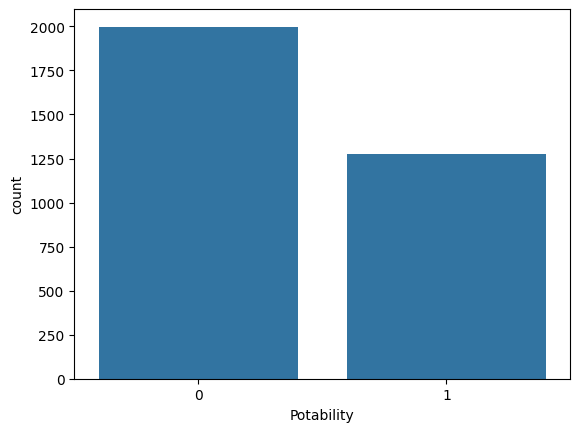

In [11]:
sns.countplot(x="Potability",data=df)

In [12]:
df["Potability"].value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

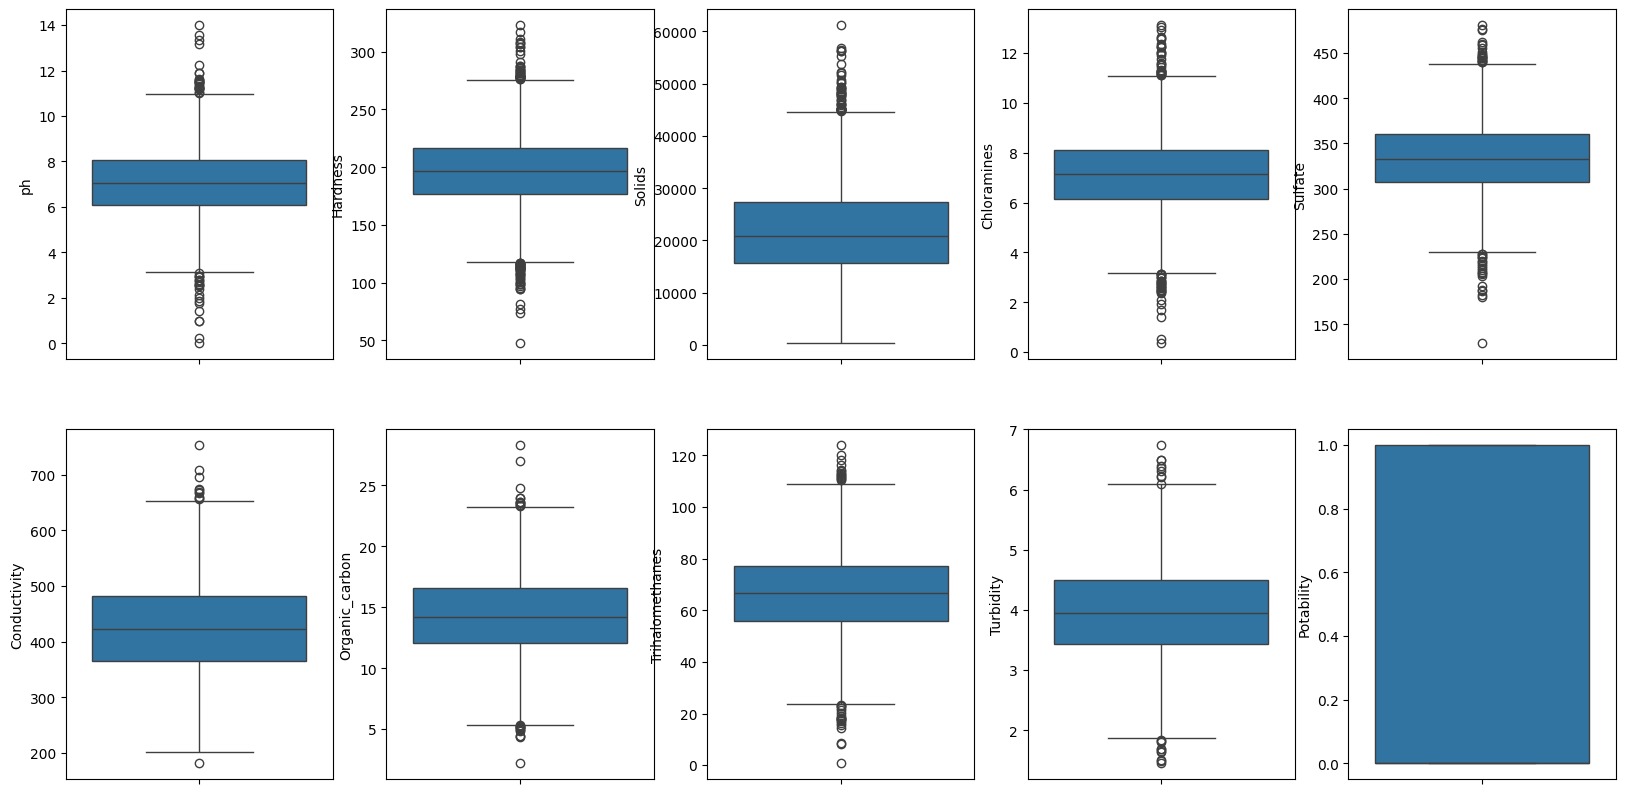

In [13]:
#Visulaization dataset also checking for outliers

fig, ax = plt.subplots(ncols=5, nrows=2, figsize = (20, 10) )

ax = ax.flatten()
index = 0

for col,values in df.items():
    sns.boxplot(y=col,data=df,ax=ax[index])
    index +=1

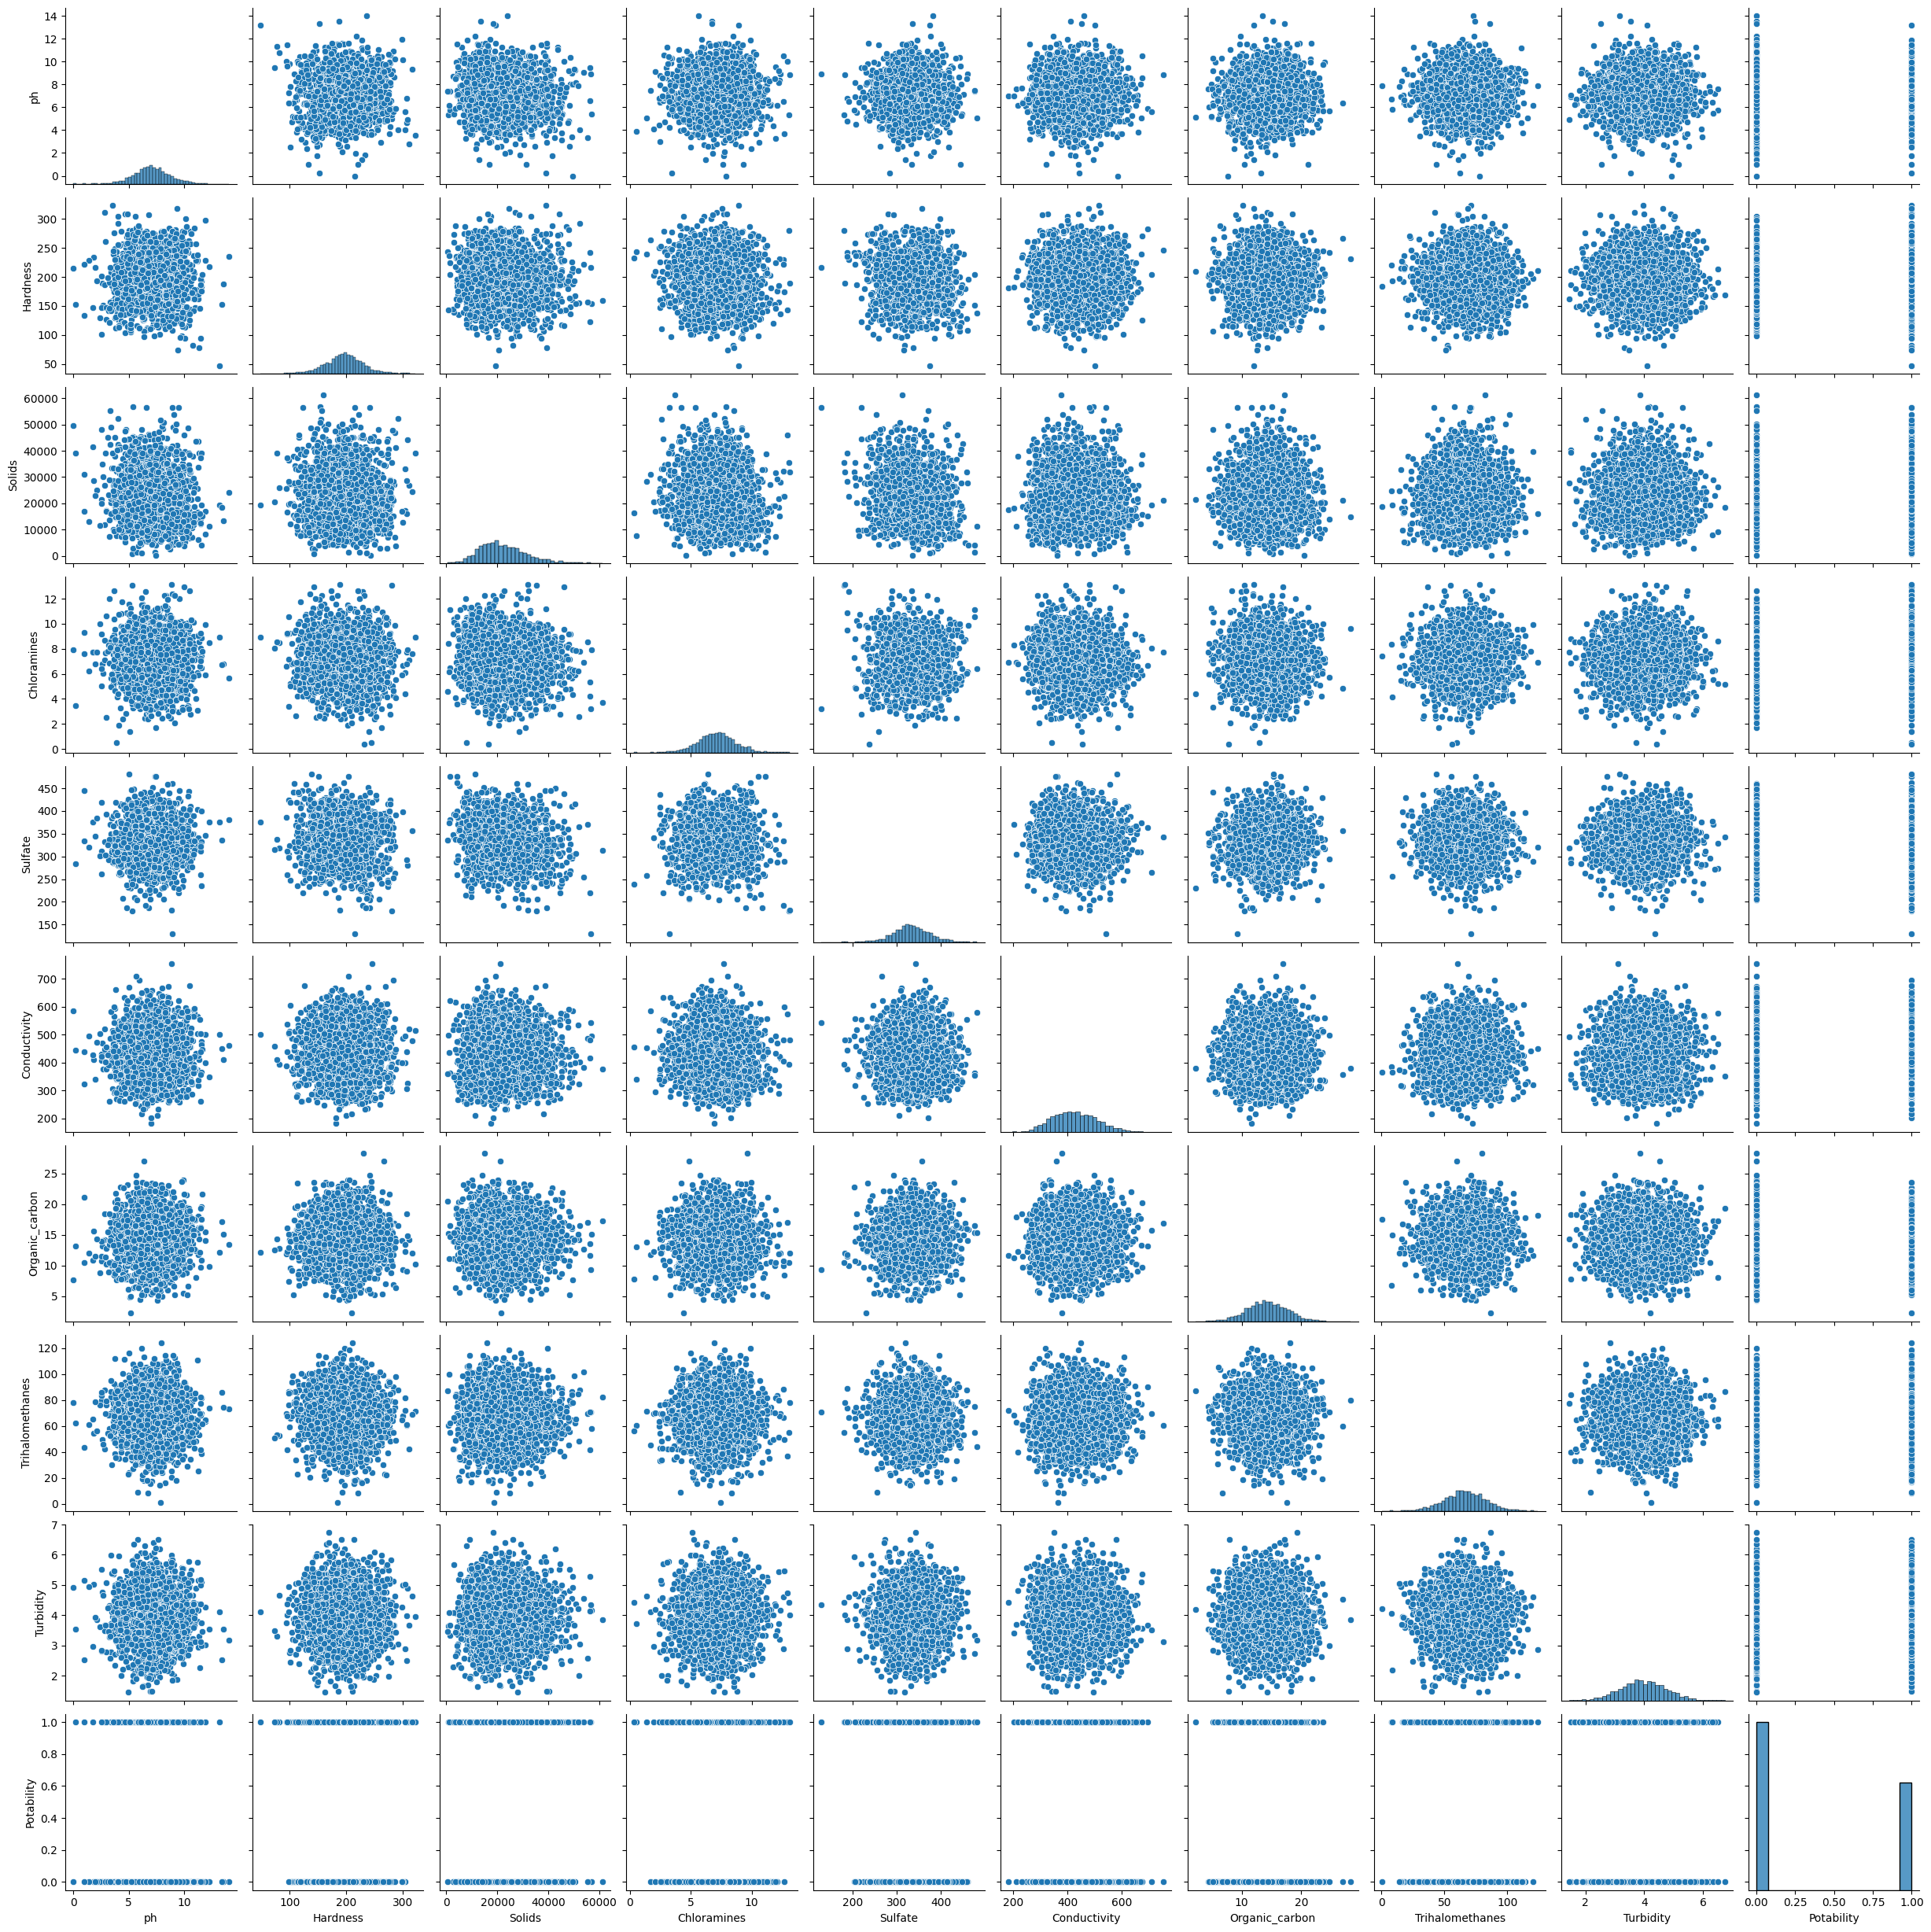

In [15]:
fig = px.pie(df,names = "Potability", hole = 0.4)

fig.show()

In [16]:
fig = px.scatter(df,x = "ph",y="Sulfate",color = "Potability",template= "plotly_dark")

fig.show()

In [17]:
fig = px.scatter(df,x = "Organic_carbon",y="Hardness",color = "Potability",template= "plotly_dark")

fig.show()

Text(0.5, 0, 'Features')

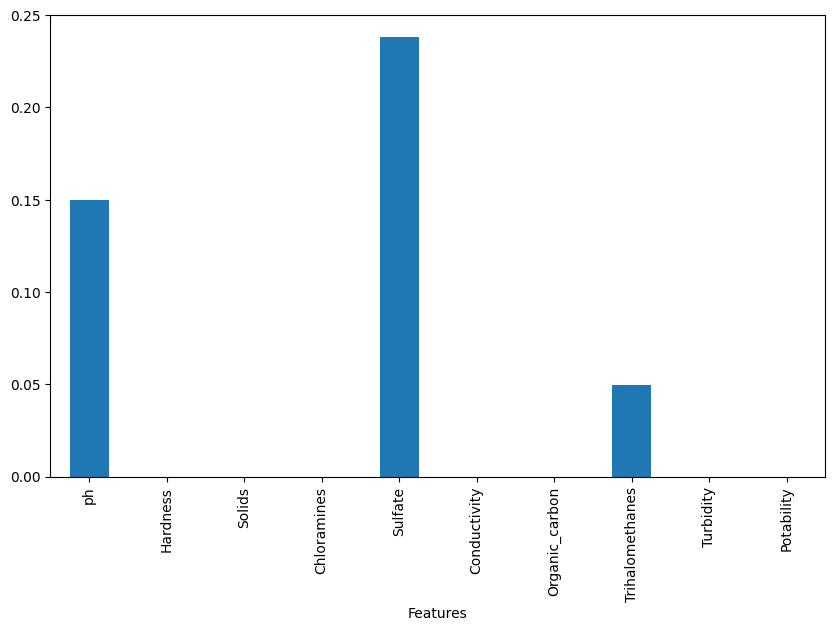

In [18]:
#Null Filling
df.isnull().mean().plot.bar(figsize =( 10, 6 )) 
plt.xlabel("Features")

In [19]:
df["ph"] = df["ph"].fillna(df["ph"].mean())

df["Sulfate"] = df["Sulfate"].fillna(df["Sulfate"].mean())

df["Trihalomethanes"] = df["Trihalomethanes"].fillna(df["Trihalomethanes"].mean())

In [20]:
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [21]:
#Data preprocessing
df.head()

ph    Hardness       Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890456  20791.31898     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.05786     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.54173     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.41744     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.98634     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436525       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [22]:
x = df.drop("Potability",axis=1)

y = df["Potability"]

In [23]:
x.shape, y.shape


((3276, 9), (3276,))

In [24]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
from sklearn.neighbors import KNeighborsClassifier

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

x_train.shape, x_test.shape

((2620, 9), (656, 9))

In [26]:
#KNN ALgorithm
from sklearn.neighbors import KNeighborsClassifier
for i in range(4,11):
    model_knn = KNeighborsClassifier(n_neighbors=i)
    model_knn.fit(x_train,y_train)
    pred_knn = model_knn.predict(x_test)
    accuracy_score_knn = accuracy_score(y_test,pred_knn)
    print(i,accuracy_score_knn)

4 0.6402439024390244
5 0.6310975609756098
6 0.6554878048780488
7 0.6432926829268293
8 0.6554878048780488
9 0.6448170731707317
10 0.663109756097561


In [27]:
model_knn = KNeighborsClassifier(n_neighbors=11)

model_knn.fit(x_train,y_train)

pred_knn = model_knn.predict(x_test)

accuracy_score_knn= accuracy_score(y_test,pred_knn)

print(accuracy_score_knn*100)

65.2439024390244


In [28]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

# creating the model object

model_dt =DecisionTreeClassifier(max_depth=4)

In [29]:
#Training of decision tree 
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [30]:
#Making prediction using Decision Tree

pred_dt = model_dt.predict(x_test)

In [31]:
accuracy_score_dt = accuracy_score(y_test,pred_dt)

accuracy_score_dt

0.6600609756097561

In [32]:
#confusion matrix

cm2 = confusion_matrix(y_test,pred_dt)

cm2

array([[380,  35],
       [188,  53]])

In [33]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression

#object of LR

model_lr = LogisticRegression()

In [34]:
#Training Model

model_lr.fit(x_train,y_train)

LogisticRegression()

In [35]:
#Making Prediction

pred_lr = model_lr.predict(x_test)

In [36]:
# accuracy score

accuracy_score_lr = accuracy_score(y_test,pred_lr)

accuracy_score_lr

0.635670731707317

In [37]:
#Random forest
from sklearn.ensemble import RandomForestClassifier

# Creating model object

model_rf = RandomForestClassifier()

#Training Model RF

model_rf.fit(x_train,y_train)

RandomForestClassifier()

In [38]:
#Making Prediction

pred_rf = model_rf.predict(x_test)


accuracy_score_rf=accuracy_score(y_test,pred_rf)

accuracy_score_rf*100

68.90243902439023

In [39]:
#svm
from sklearn.svm import SVC

#Creating object of Model

model_svm = SVC(kernel="rbf")

In [40]:
#Model training

model_svm.fit(x_train,y_train)


SVC()

In [41]:
#Make prediction

pred_svm = model_svm.predict(x_test)

In [42]:
accuracy_score_svm = accuracy_score(y_test,pred_svm)

accuracy_score_svm*100

71.03658536585365

In [43]:
#Accuracy visualisation
models = pd.DataFrame({
    "Model": ["KNN",
              "Decision Tree",
              "Logistic Regression",
              "Random Forest",
              "SVM"],
    "Accuract Score" : [accuracy_score_knn,accuracy_score_dt,accuracy_score_lr, accuracy_score_rf,accuracy_score_svm]
})

In [44]:
models

Model  Accuract Score
0                  KNN        0.652439
1        Decision Tree        0.660061
2  Logistic Regression        0.635671
3        Random Forest        0.689024
4                  SVM        0.710366

Model  Accuract Score
4                  SVM        0.710366
3        Random Forest        0.689024
1        Decision Tree        0.660061
0                  KNN        0.652439
2  Logistic Regression        0.635671

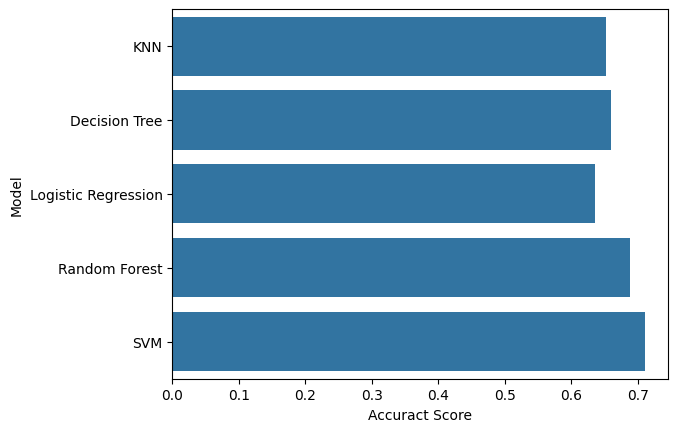

In [45]:
sns.barplot(x="Accuract Score",y= "Model" ,data=models)

models.sort_values(by="Accuract Score",ascending=False)